# Analisis Exploratorio de los estudiantes del primer ciclo del 2023

## Introduccion

Para saber qué factor puede afectar al rendimiento del alumno, comparamos la puntuación versus un par de rangos y averiguamos qué característica afecta a la puntuación de forma más significativa. Las variables independientes son las siguientes:

1. género: sexo de los alumnos
2. nivel educativo de la madre: Como en Rep. Dom, la mayoria de las familias esta dirigido por una madre soltera, nos enfocamos en el nivel educativo final de la madre.
3. horas de estudio: cuantas horas a la semana dedica el estudiante a aprender fuera del aula.
4. domicilio: donde vive el estudiante


### Adquisición de la Data


In [1]:
# Importamos las librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc

In [2]:
# Cargamos el data set
df = pd.read_excel("data/students_data.xlsx")

In [3]:
# Mostramos algunas de las primeras filas del dataframe
df.head()

,ID,nacionalidad,habilidad_que_mas_aprende,genero,cambiaria_de_la_clase,consejo_estudiantes_proximo_ano,quiero_aprender,estoy_orgulloso,educacion_padres,educacion_estudiante,...,estado_civil,empleo,hijos,domicilio,Parcial_1,Parcial_2,Parcial_3,Parcial_4,Promedio_Final,Aprobado
0,SS001,Dominicano,Leer,Femenino,El relajo en la clase cuando se trata de cosas...,Que tu profesor hace un 50% para que tu aprend...,Como mantener una conversación.,De iniciar el curso y saber que pobre terminar...,2,2,...,Soltero,No,1,SDN,78,74,75,80,76.75,S
1,SS002,Dominicano,Escribir,Masculino,Hasta ahora nada,Que no le dejen todo a la clase que vengan con...,Hablar mas fluido,De que puedo entender más el inglés y a la hor...,3,1,...,Soltero,Sí,0,SDN,60,62,67,64,63.25,N
2,SS003,Dominicano,Escribir,Masculino,Que los compañeros seamos más aplicados en la ...,Que sé enfoque en aprender y coger esto en ser...,Poder escuchar y entender para asi comunicarme...,Cue he ido aprendiendo y enserio me siento sup...,3,2,...,Soltero,Sí,1,DN,86,58,80,85,77.25,S
3,SS004,Dominicano,Escribir,Masculino,Que hubiera una clase de fonética para que así...,Que estudien más en casa acerca de lo que el p...,Me gustaría aprender italiano y japonés. Tambi...,Estoy orgulloso de que he podido dominar temas...,3,1,...,Soltero,Sí,0,DN,92,96,95,98,95.25,S
4,SS005,Dominicano,Escribir,Femenino,"Nada , por ahora","Que estudien , participen y siempre presten at...",Me gustaría entender mas los textos y hablar m...,De hacer mi presentación en frente de los comp...,1,1,...,Soltero,No,0,SDO,62,82,25,68,59.25,N


### Carga y Exploracion de la Data


In [4]:
# Mostramos la forma del dataframe
print("Forma del dataframe:", df.shape)

# Mostramos los nombres de las columnas
print("\nColumnas en el dataframe:", df.columns)

# Mostramos el tipo de data en cada columna
print("\nTipo de data en las columnas:")
print(df.dtypes)

# Mostrar estadísticas resumidas de cada columna
print("\nEstadsiticas resumidas:")
print(df.describe())

Forma del dataframe: (43, 25)

Columnas en el dataframe: Index(['ID', 'nacionalidad', 'habilidad_que_mas_aprende', 'genero',
       'cambiaria_de_la_clase', 'consejo_estudiantes_proximo_ano',
       'quiero_aprender', 'estoy_orgulloso', 'educacion_padres',
       'educacion_estudiante', 'habilidad_ingles_facil', 'edad',
       'habilidad_ingles_dificil', 'estudia_para_examen', 'horas_que_estudia',
       'estado_civil', 'empleo', 'hijos', 'domicilio', 'Parcial_1',
       'Parcial_2', 'Parcial_3', 'Parcial_4', 'Promedio_Final', 'Aprobado'],
      dtype='object')

Tipo de data en las columnas:
ID                                  object
nacionalidad                        object
habilidad_que_mas_aprende           object
genero                              object
cambiaria_de_la_clase               object
consejo_estudiantes_proximo_ano     object
quiero_aprender                     object
estoy_orgulloso                     object
educacion_padres                     int64
educacion_estu

In [5]:
# Seleccionamos el subset de los examenenes
examenes = df[["Parcial_1", "Parcial_2", "Parcial_3", "Parcial_4"]]

# Mostramos las estadisticas resumidas de los examenes
examenes.describe()

# Calculamos la media de cada examen
promedio_de_examenes = examenes.mean()

# Identificamos los examenes con la media más alta y más baja
examen_promedio_mas_alto = (examenes.mean().idxmax(),)
examen_promedio_mas_bajo = examenes.mean().idxmin()

In [6]:
# Mostramos el examen con la media más alta y la media más baja
print(f"El examen con la media más alta es: {examen_promedio_mas_alto}")
print(f"El examen con la media más baja es:", examen_promedio_mas_bajo)

# Mostramos el promedio de cada examen
print("\nPromedio de cada examen:")
print(promedio_de_examenes)

El examen con la media más alta es: ('Parcial_4',)
El examen con la media más baja es: Parcial_1

Promedio de cada examen:
Parcial_1    71.790698
Parcial_2    77.093023
Parcial_3    74.813953
Parcial_4    77.953488
dtype: float64


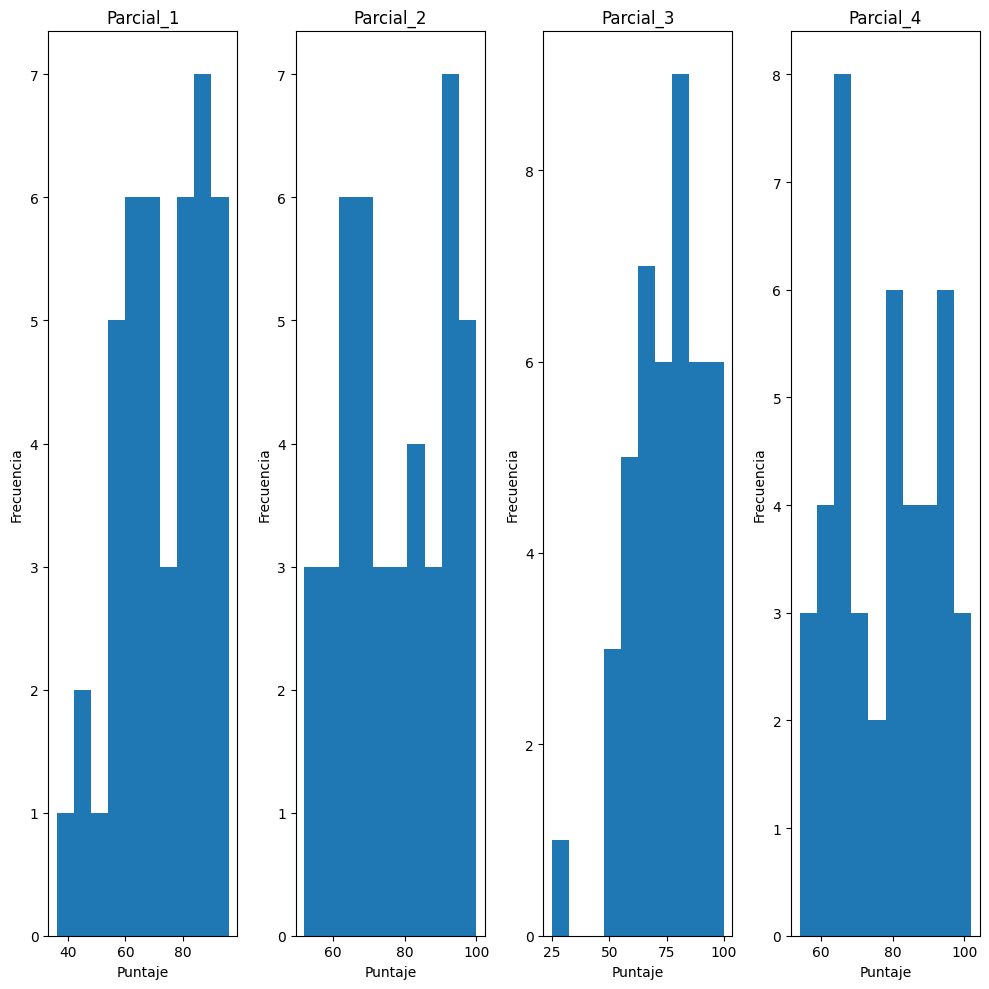

In [7]:
# Visualizamos la distribución de los examenes con un histograma
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
for i, col in enumerate(examenes.columns):
    ax = axes[i]
    examenes[col].plot(kind="hist", ax=ax, title=col)
    ax.set_xlabel("Puntaje")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()

Este histograma representa la distribución del puntaje de los cuatro parciales. Se puede observar que en el tercer parcial hay un outlier que se aleja del resto de los datos. Este outlier es el estudiante que obtuvo el puntaje más bajo en el tercer parcial.


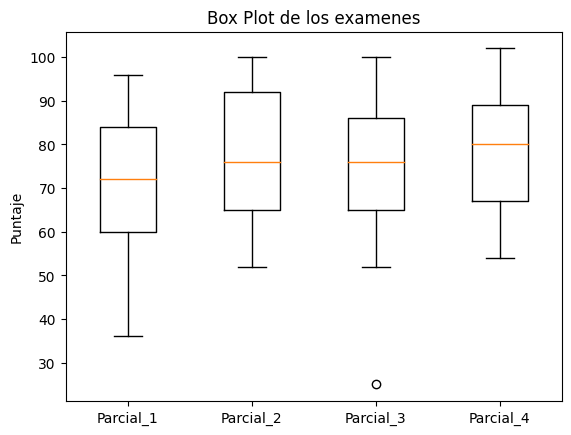

In [8]:
# Visualizamos la distribución de los examenes con un box plot

data = examenes

# Creamos una figura y los ejes (ax)
fig, ax = plt.subplots()

# Creamos el box plot
ax.boxplot(data.values)

# Seteamos label y título
ax.set_xticklabels(data.columns)
ax.set_ylabel("Puntaje")
ax.set_title("Box Plot de los examenes")

# Mostramos el plot
plt.show()

Este blox plot representa el puntaje de los examenes y sus outliers, se puede observer que solo el tercer parcial tiene outliers.


## Analizamos la tendencia de los examenes.


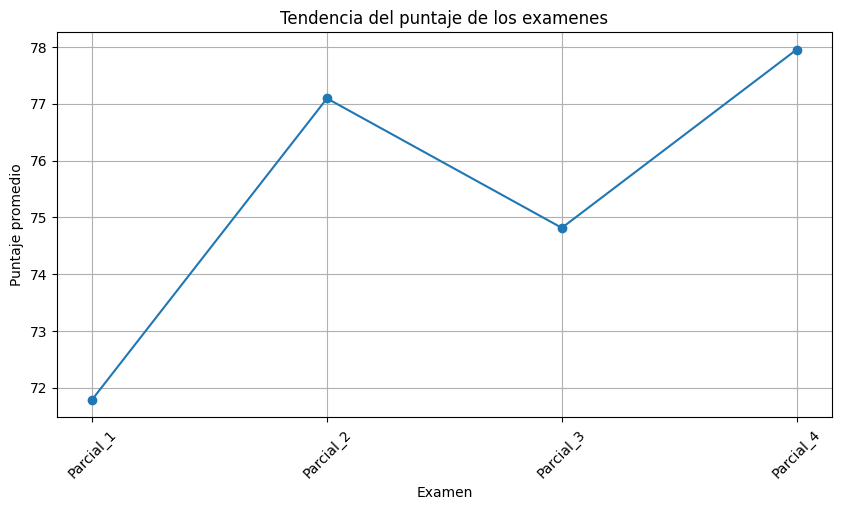

In [9]:
# Ploteamos la tendencia del puntaje de los examenes usando un line plot

plt.figure(figsize=(10, 5))
plt.plot(examenes.columns, promedio_de_examenes, marker="o")
plt.title("Tendencia del puntaje de los examenes")
plt.xlabel("Examen")
plt.ylabel("Puntaje promedio")
plt.xticks(rotation=45)
plt.grid(True)

Este plot es la representación de la tendencia del puntaje de los exámenes en el tiempo, se puede observar que el Parcial_4 es el que tiene mayor puntaje lo cual demuestra que los estudiantes se esfuerzan más en este examen, por otro lado, el Parcial_1 es el que tiene menor puntaje, esto puede ser debido a que los estudiantes no se esfuerzan tanto en este examen.


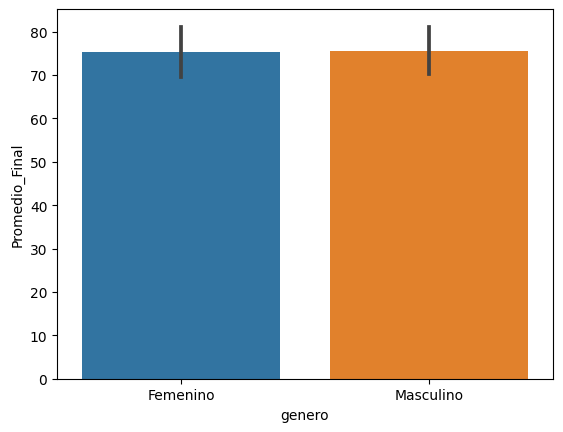

In [10]:
# Puntaje basado en el género

sns.barplot(x="genero", y="Promedio_Final", data=df)
plt.show()

Este plot es la representación visual de la distribución de los examenes basado en el género. Se puede observar que las mujeres tienen una nota ligeramente más alta que los hombres.


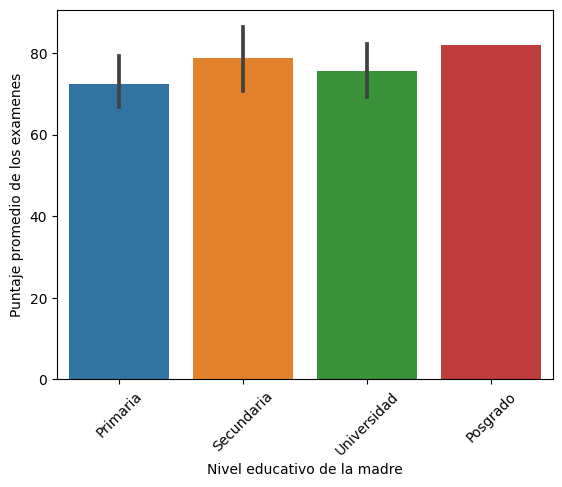

In [11]:
# Barplot de los examenes basado en el nivel educativo de los padres

sns.barplot(x="educacion_padres", y="Promedio_Final", data=df)
plt.xlabel("Nivel educativo de la madre")
plt.ylabel("Puntaje promedio de los examenes")

# Cambiamos los nombres de las columnas
xtick_labels = ["Primaria", "Secundaria", "Universidad", "Posgrado"]
plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels, rotation=45)

# Mostramos el plot
plt.show()

Este box plot representa el puntaje promedio de los examenes basado en la educacion de la madre. Podemos observar que a medida que la educacion de la madre aumenta, el puntaje promedio de los examenes también aumenta.


Ahora veamos la relacion entre el promedio de horas de estudio y el puntaje promedio


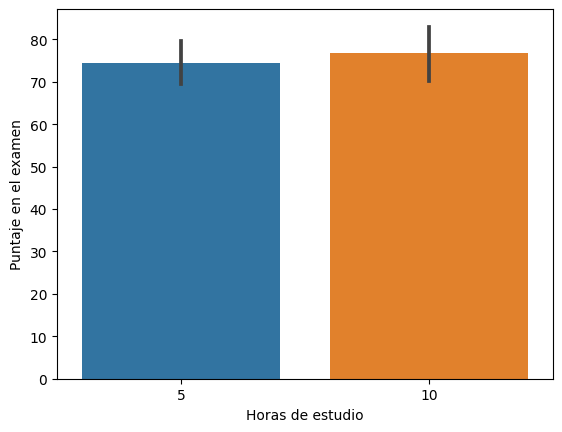

In [12]:
# Barplot de los examenes basado en horas de estudio.

sns.barplot(x="horas_que_estudia", y="Promedio_Final", data=df)
plt.xlabel("Horas de estudio")
plt.ylabel("Puntaje en el examen")


# Mostramos el plot
plt.show()

Este box plot representa el puntaje promedio de los examenes basado en las horas de estudio del estudiante. Podemos observar que a medida que aumentan las horas de estudio, aumenta la nota en el examen.


Al encontrarse la escuela en el Distrito Nacional, es bueno saber donde residen nuestros estudiantes y si esto afecta de alguna manera a su rendimiento.


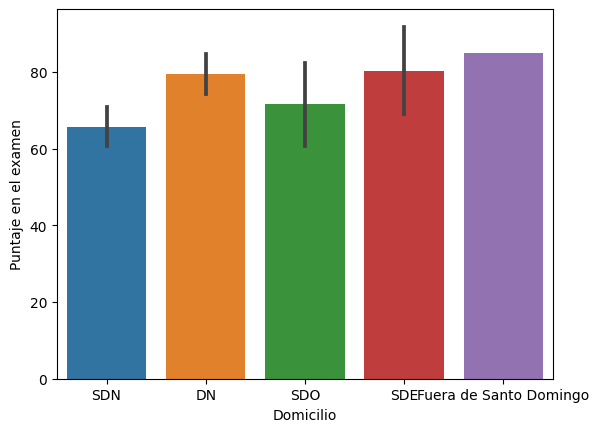

In [13]:
# Barplot de los examenes basado en horas de estudio.

sns.barplot(x="domicilio", y="Promedio_Final", data=df)
plt.xlabel("Domicilio")
plt.ylabel("Puntaje en el examen")


# Mostramos el plot
plt.show()

Este grafico nos muestra que en promedio los estudiantes que viven en Santo Domingo Norte y Santo Domingo Oeste, son los que tienen peor rendimiento. Sin embargo aquellos que viven Fuera del Gran Santo Domingo, tienen el mejor. El Distrito Nacional y Santo Domingo Este tienen un rendimiento similar.


## Ahora usemos WordCloud para ver las palabras más usadas por los estudiantes al responder tres preguntas:


In [31]:
# Creamos una funcion que recibe el texto para crear el wordcloud


def get_wordcloud(texto: str, num: int):
    stopwords = list(wc.STOPWORDS)
    custom_stop_words = ["Estoy", "estoy"]
    stopwords = set(stopwords + custom_stop_words)
    wordcloud = wc.WordCloud(
        stopwords=stopwords, min_word_length=num, background_color="white"
    ).generate(texto)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

### Que quieres aprender?


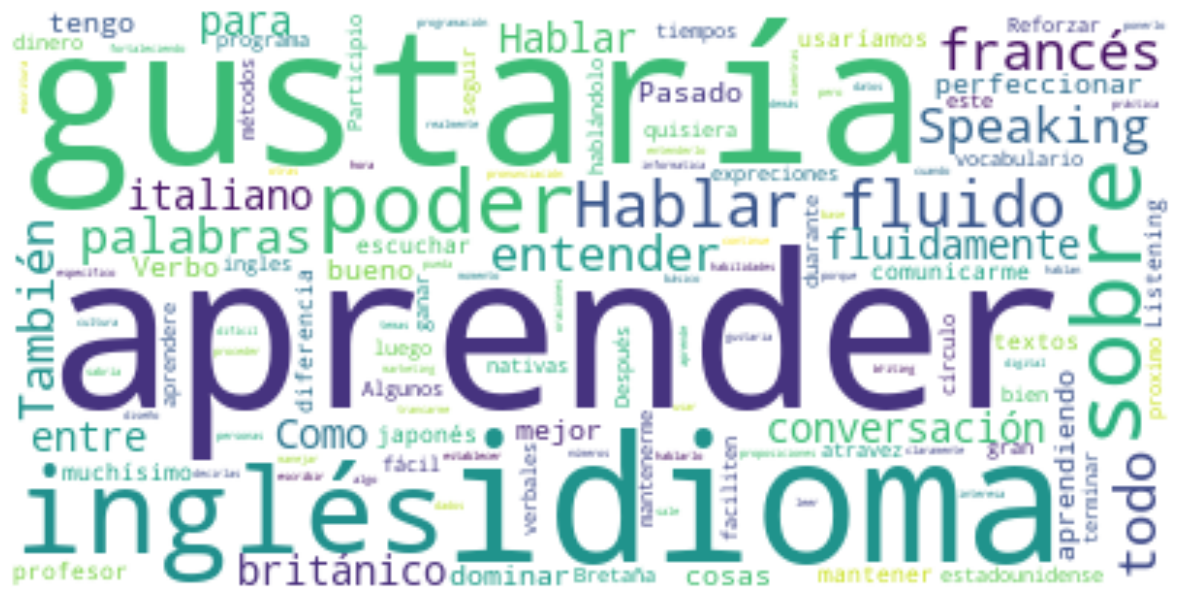

In [32]:
text = " ".join(i for i in df["quiero_aprender"])
get_wordcloud(text, 4)

### De que estás más orgulloso?


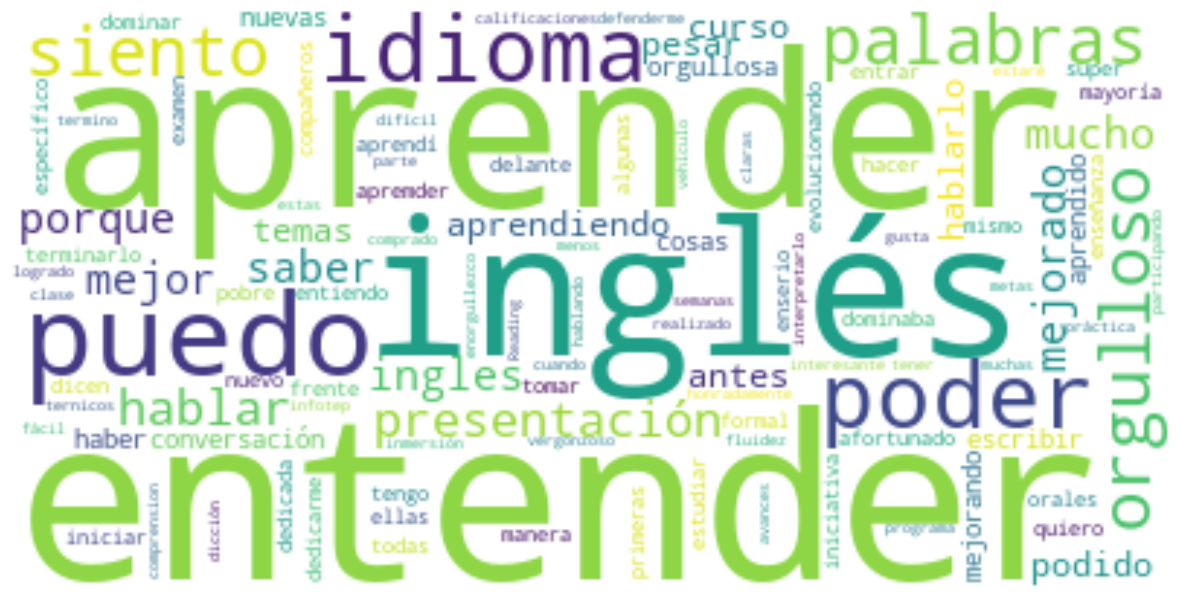

In [33]:
text = " ".join(i for i in df["estoy_orgulloso"])
get_wordcloud(text, 5)

### Consejo que le dejan a los estudiantes del proximo año.


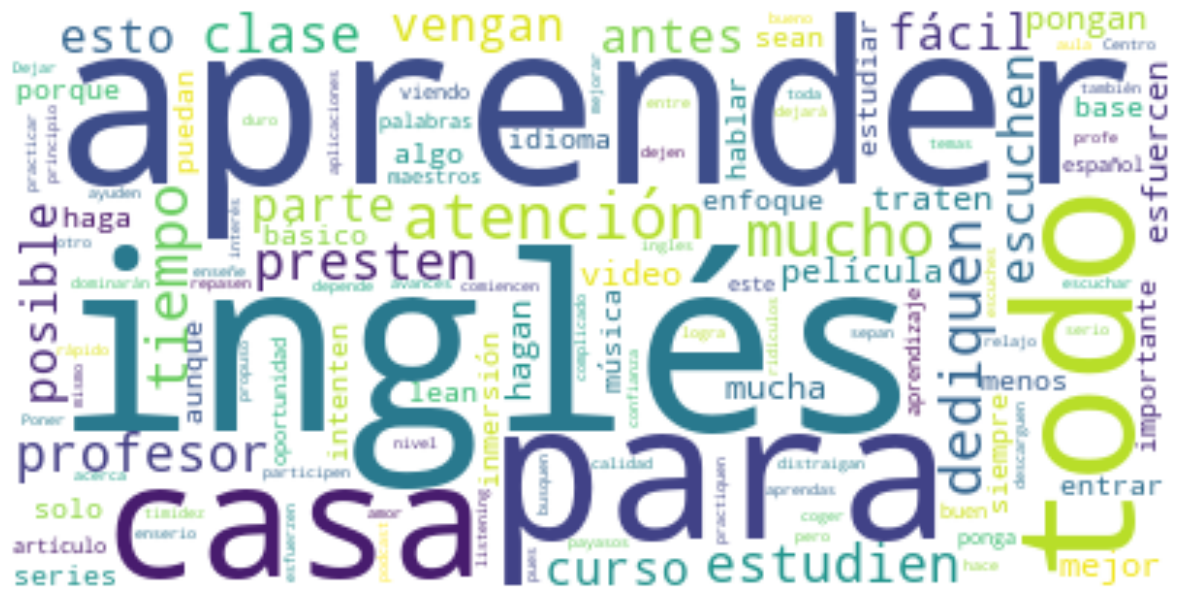

In [34]:
text = " ".join(i for i in df["consejo_estudiantes_proximo_ano"])
get_wordcloud(text, 4)

## Conclusión

A continuación se exponen algunas conclusiones:

1. El nivel educativo de los padres puede afectar al rendimiento de los alumnos.
2. Estudiar para los examenes es beneficioso.
3. El género no tiene mucha correlación con la puntuación.
4. Los estudiantes de Santo Domingo Norte muestran el peor rendimiento

Recomendaciones:

1. Establecer programas de apoyo a los padres: Considerar la implementación de programas que brinden recursos y orientación a los padres con un nivel educativo más bajo. Esto puede incluir talleres sobre técnicas de estudio, estrategias para motivar a sus hijos y la importancia de la educación. Al empoderar a los padres, se crea un entorno más favorable para el éxito académico de los estudiantes.

2. Fomentar el hábito de estudio regular: Educar a los estudiantes sobre la importancia de estudiar de manera constante y no solo antes de los exámenes. Animar a los alumnos a establecer rutinas de estudio diarias, divididas en sesiones más cortas y enfocadas, en lugar de estudiar durante largos períodos de tiempo sin descanso. Esto les ayudará a retener mejor la información y a evitar la procrastinación.

3. Proporcionar recursos de estudio efectivos: Ofrecer a los estudiantes herramientas y técnicas de estudio que les ayuden a maximizar su aprendizaje. Estos recursos pueden incluir técnicas de toma de apuntes, resúmenes, mapas mentales, uso de flashcards, videos educativos, tutoriales en línea, entre otros. Enséñales a utilizar estas herramientas de manera efectiva para que puedan organizar y comprender mejor los conceptos clave.

4. Implementar programas de tutoría y apoyo académico: Establecer programas de tutoría y mentoría donde los estudiantes puedan recibir ayuda adicional de profesores o estudiantes de cursos superiores. Estas sesiones pueden centrarse en áreas específicas donde los estudiantes están luchando, proporcionando explicaciones claras y práctica adicional para mejorar su comprensión.

5. Promover un enfoque equitativo de género: Asegurarse de que los estudiantes, independientemente de su género, reciban las mismas oportunidades educativas y de apoyo. Fomentar la participación equitativa en actividades extracurriculares, competencias académicas y programas de liderazgo. Además, trabajar en la eliminación de los estereotipos de género en el ámbito educativo y promover un ambiente inclusivo y respetuoso.

6. Identificar y abordar las barreras del rendimiento en Santo Domingo Norte: Realiza un análisis más profundo para comprender las causas subyacentes del bajo rendimiento en Santo Domingo Norte. Esto puede incluir factores como falta de recursos educativos, desafíos socioeconómicos, problemas de infraestructura escolar, entre otros. Desarrolla estrategias específicas para abordar estas barreras y mejorar las condiciones educativas en esa región.
